# Exploratory Data Analysis

### Data Preprocessing

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
all_recipes_pp = pd.read_csv('data/PP_recipes.csv')
all_recipes_raw = pd.read_csv('data/RAW_recipes.csv')

In [3]:
#Display raw data
all_recipes_raw.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9
3,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7
4,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13


In [4]:
#Display processed data 
all_recipes_pp.head()

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


### General Data Overview

Disclaimer: it's kinda pointless to just analyze the pp data so uh yeah

In [5]:
all_recipes_raw.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,83782.000000,8.378200e+04,8.378200e+04,83782.000000,83782.000000
mean,381430.405529,1.150309e+02,1.504084e+07,10.105440,9.214020
std,68715.482810,3.990871e+03,1.655022e+08,6.390109,3.830465
min,275022.000000,0.000000e+00,1.533000e+03,1.000000,1.000000
25%,321548.500000,2.000000e+01,2.254260e+05,6.000000,6.000000
50%,374472.500000,3.500000e+01,4.612830e+05,9.000000,9.000000
75%,436200.750000,6.500000e+01,8.274370e+05,13.000000,12.000000
max,537716.000000,1.051200e+06,2.002290e+09,100.000000,37.000000


In [6]:
all_recipes_raw.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

### Univariate Analysis

#### Analyzing Recipe Names

In [7]:
#Define stop words that we want to avoid
stop_words = ["the", "a", "an", "and", "or", "with", "without", "from", "of", "for", "to", "in", "on", "by", "s"]

In [8]:
#Analyze the most repeated words in name:
word_cleaner = lambda x: x.lower().strip()

#Filter out all words present in the recipe names 
all_split_names = all_recipes_raw['name'].apply(lambda x: str(x).split())
all_unigrams_in_names = pd.Series([word_cleaner(word) for name in all_split_names for word in name if word not in stop_words])
all_unigrams_in_names

0                  1
1           brownies
2              world
3               best
4               ever
             ...    
344579       cookies
344580        design
344581         sugar
344582    shortbread
344583       cookies
Length: 344584, dtype: object

Text(0.5, 1.0, 'Top 10 Most Frequent Unigrams in Recipe Names')

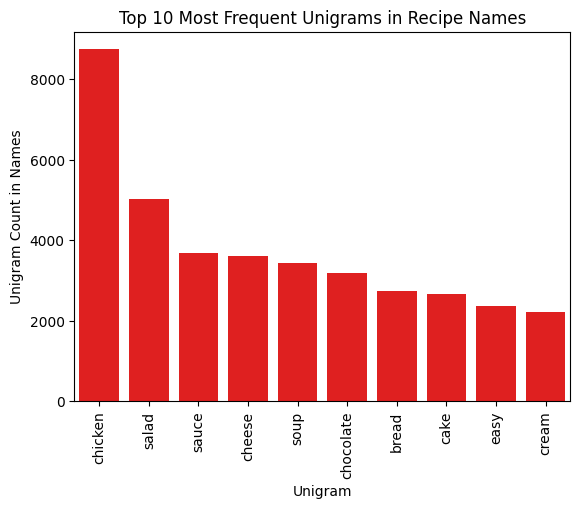

In [9]:
#Top 10 most common unigrams 
unigram_counts = all_unigrams_in_names.value_counts()
top_ten_name_unigrams = unigram_counts.sort_values().nlargest(n = 10)

sns.barplot(top_ten_name_unigrams, color = 'red')
plt.xticks(rotation = 90)
plt.xlabel('Unigram')
plt.ylabel('Unigram Count in Names')
plt.title('Top 10 Most Frequent Unigrams in Recipe Names')

In [10]:
#Analyze the most repeated words in name:
word_cleaner = lambda x: x.lower().strip()

#Filter out all words present in the recipe names 
all_bigrams = []
for i in range(len(all_unigrams_in_names) - 1):
    all_bigrams.append((all_unigrams_in_names[i], all_unigrams_in_names[i + 1]))

all_bigrams = pd.Series(all_bigrams)


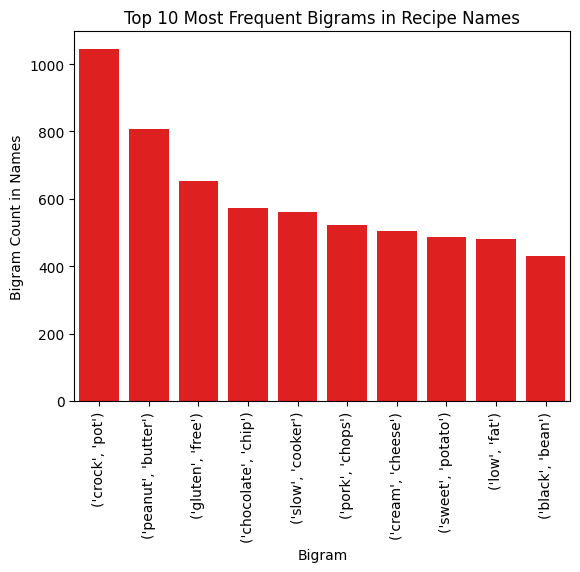

In [11]:
# Top 10 most common bigrams
bigram_counts = all_bigrams.value_counts()
top_ten_name_bigrams = bigram_counts.nlargest(n = 10)  # already sorted descending


sns.barplot(x = top_ten_name_bigrams.index.astype(str), y = top_ten_name_bigrams.values, color = 'red')
plt.xticks(rotation=90)
plt.xlabel('Bigram')
plt.ylabel('Bigram Count in Names')
plt.title('Top 10 Most Frequent Bigrams in Recipe Names')
plt.show()


#### Analyzing Tags

In [12]:
#Analyze the most repeated words in name:
tag_cleaner = lambda x: x.replace('\'', '').replace('[', '').replace(']', '').replace(',', '')

cleaned_tags = all_recipes_raw['tags'].apply(tag_cleaner)
final_tags = pd.Series([word for tag in cleaned_tags for word in tag.split()])

Text(0.5, 1.0, 'Top 10 Most Frequent Tags')

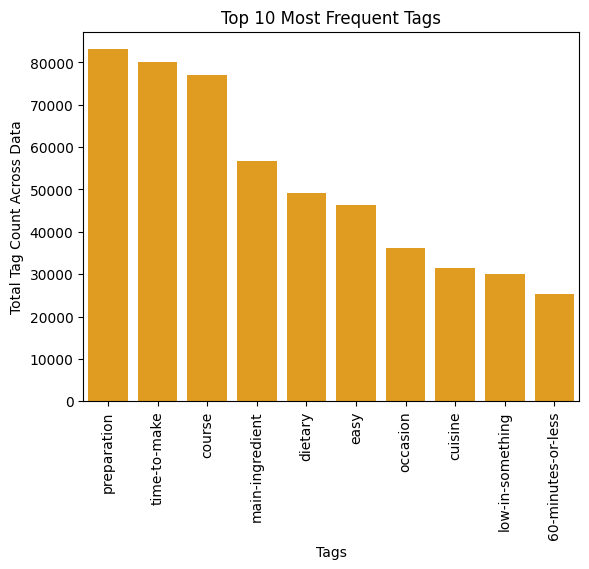

In [13]:
tag_counts = final_tags.value_counts()
top_ten_tags = tag_counts.sort_values().nlargest(n = 10)

sns.barplot(top_ten_tags, color = 'orange')
plt.xticks(rotation = 90)
plt.xlabel('Tags')
plt.ylabel('Total Tag Count Across Data')
plt.title('Top 10 Most Frequent Tags')

In [14]:
#Analyze the most repeated words in name:
steps_cleaner = lambda x: str(x).replace('\'', '').replace('[', '').replace(']', '').replace(',', '')

cleaned_descriptions = all_recipes_raw['description'].apply(steps_cleaner)
cleaned_descriptions_unigrams = pd.Series([word for step in cleaned_descriptions for word in step.split() if word not in stop_words])

Text(0.5, 1.0, 'Top 10 Most Frequent Description Unigrams')

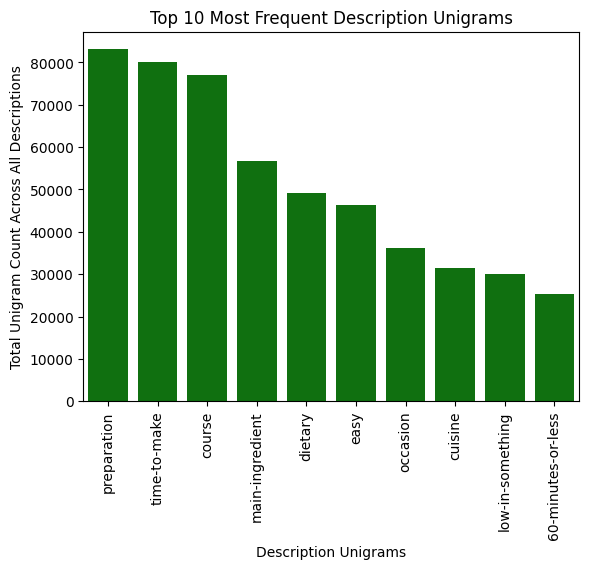

In [15]:
description_counts = cleaned_descriptions_unigrams.value_counts()
top_ten_description_words = tag_counts.sort_values().nlargest(n = 10)

sns.barplot(top_ten_description_words, color = 'green')
plt.xticks(rotation = 90)
plt.xlabel('Description Unigrams')
plt.ylabel('Total Unigram Count Across All Descriptions')
plt.title('Top 10 Most Frequent Description Unigrams')

#### Analysis of Ingredients

In [16]:
#Analyze the most repeated words in name:
steps_cleaner = lambda x: str(x).replace('\'', '').replace('[', '').replace(']', '').replace(',', '')

cleaned_ingredients = all_recipes_raw['ingredients'].apply(steps_cleaner)
cleaned_descriptions_ingredients = pd.Series([word for step in cleaned_ingredients for word in step.split() if word not in stop_words])

Text(0.5, 1.0, 'Top 10 Most Frequent Description Unigrams')

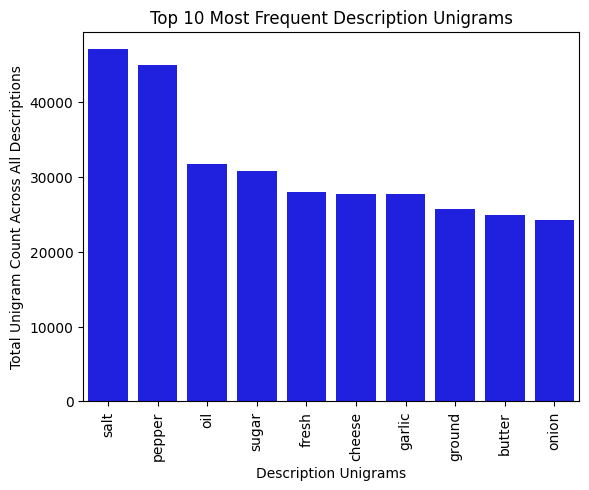

In [17]:
ingredients_counts = cleaned_descriptions_ingredients.value_counts()
top_ten_ingredients = ingredients_counts.sort_values().nlargest(n = 10)

sns.barplot(top_ten_ingredients, color = 'blue')
plt.xticks(rotation = 90)
plt.xlabel('Description Unigrams')
plt.ylabel('Total Unigram Count Across All Descriptions')
plt.title('Top 10 Most Frequent Description Unigrams')

### Bivariate Analysis

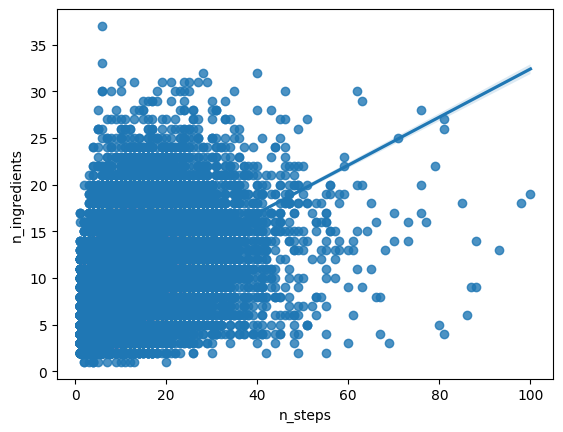

In [19]:
#Relationship between n_steps and n_ingredients, may be something to consider if the user is on a budget, has lack of experience in cooking, etc
sns.regplot(x = all_recipes_raw['n_steps'], y = all_recipes_raw['n_ingredients'])
plt.show()

### Multivariate Analysis

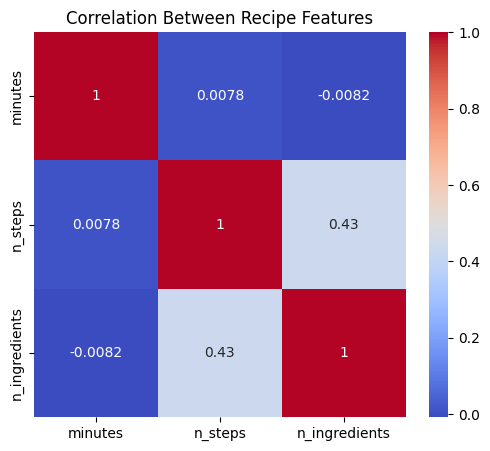

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_features = all_recipes_raw[['minutes', 'n_steps', 'n_ingredients']]

plt.figure(figsize=(6,5))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')

plt.title("Correlation Between Recipe Features")
plt.show()

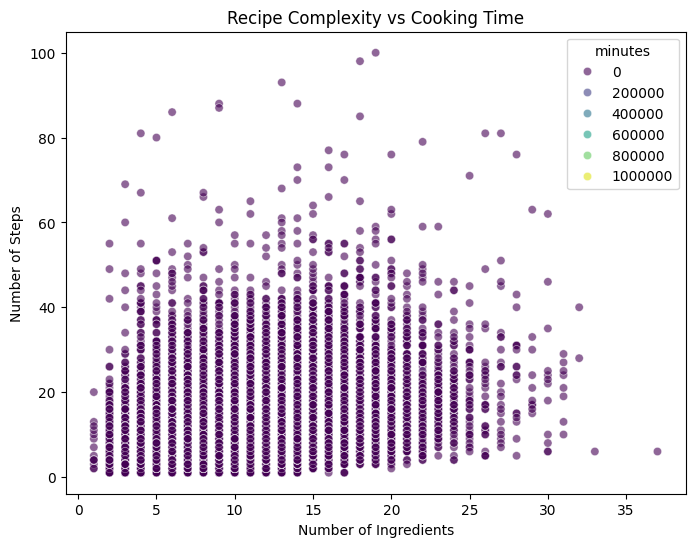

In [21]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x=all_recipes_raw['n_ingredients'],
    y=all_recipes_raw['n_steps'],
    hue=all_recipes_raw['minutes'],
    palette='viridis',
    alpha=0.6
)

plt.xlabel("Number of Ingredients")
plt.ylabel("Number of Steps")
plt.title("Recipe Complexity vs Cooking Time")
plt.show()


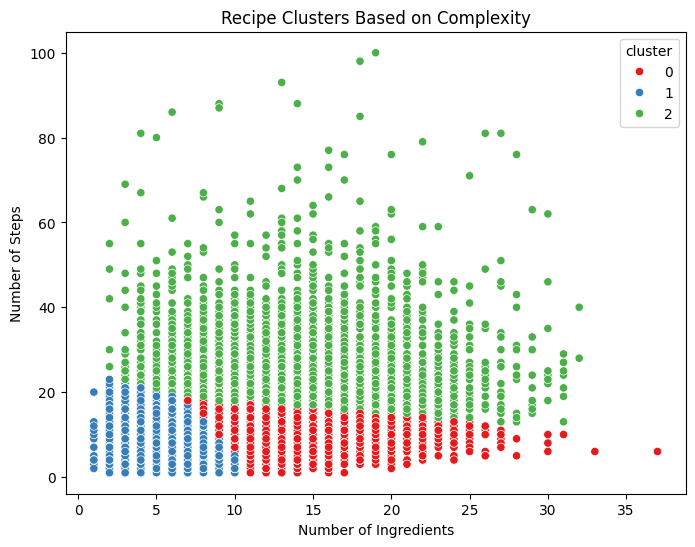

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = all_recipes_raw[['minutes','n_steps','n_ingredients']].dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
features['cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=features,
    x='n_ingredients',
    y='n_steps',
    hue='cluster',
    palette='Set1'
)

plt.xlabel("Number of Ingredients")
plt.ylabel("Number of Steps")
plt.title("Recipe Clusters Based on Complexity")
plt.show()


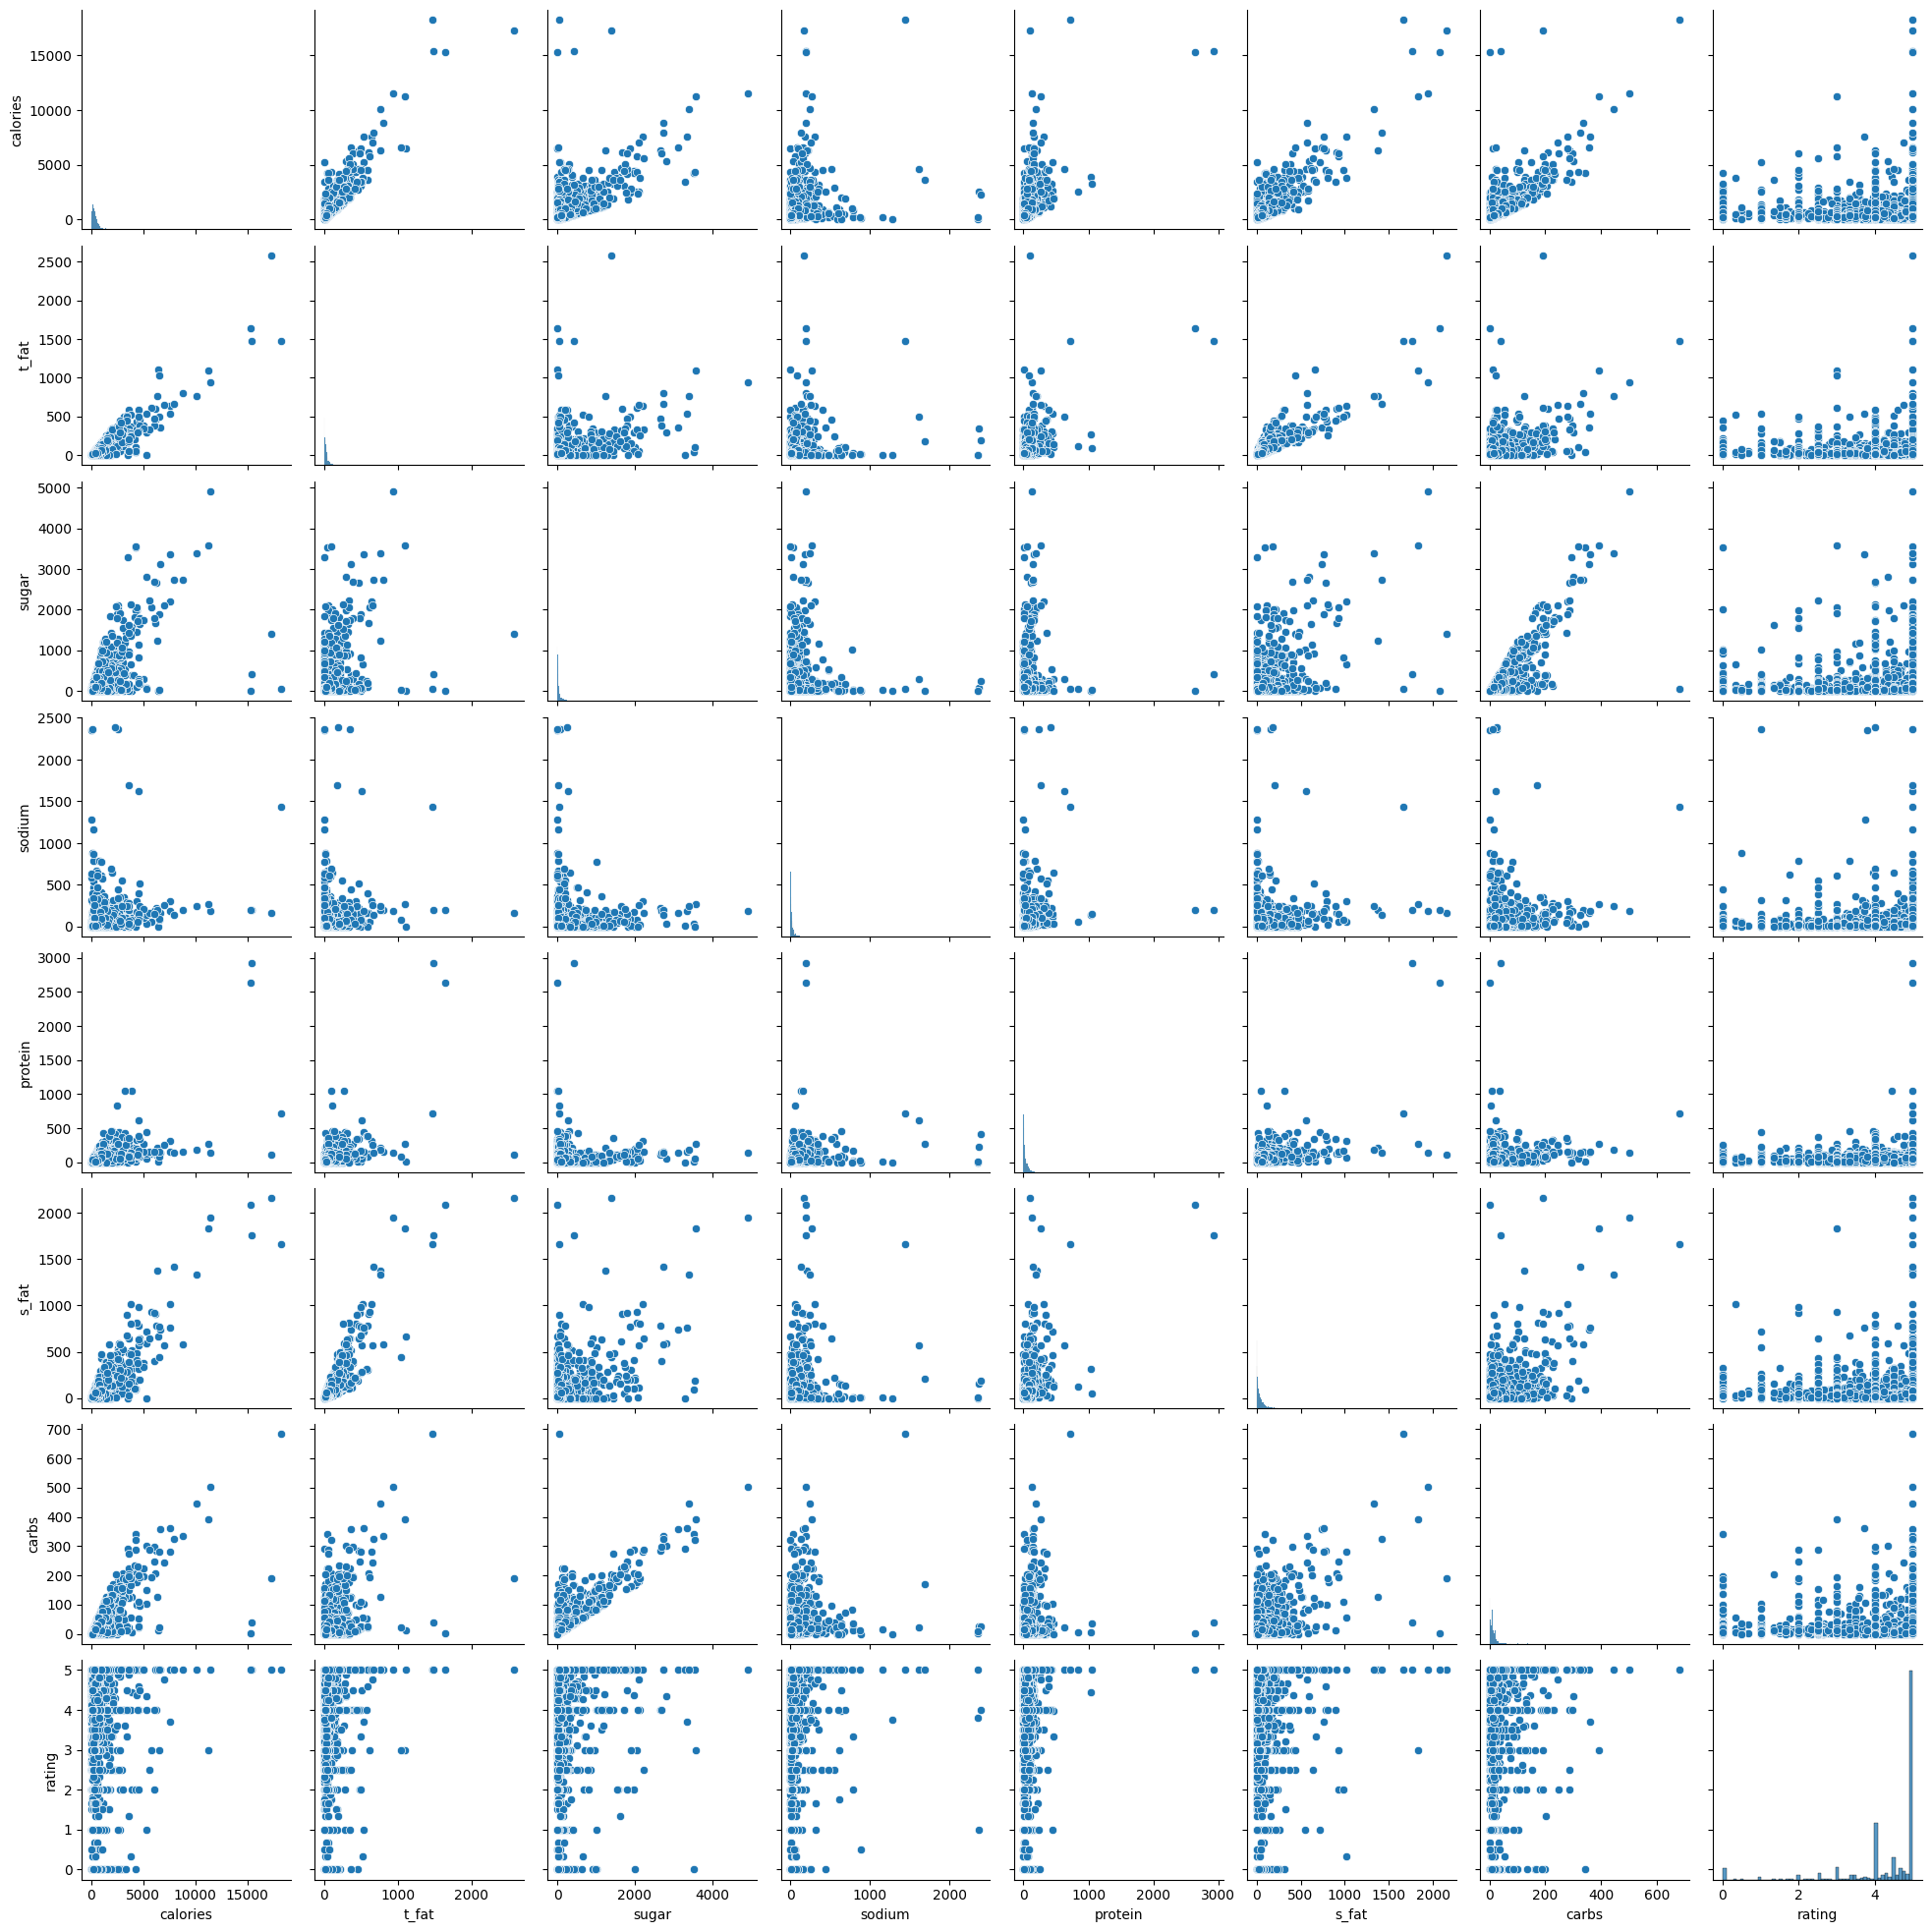

In [23]:
all_interactions_raw = pd.read_csv('data/RAW_interactions.csv')

ratings_df = all_interactions_raw[['recipe_id', 'rating']]
avg_ratings_df = ratings_df.groupby('recipe_id').mean()
avg_ratings_df

calories = []
t_fat = []
sugar = []
sodium = []
protein = []
s_fat = []
carbs = []

data = pd.DataFrame({'recipe_id': all_recipes_raw['id']})

for item in all_recipes_raw['nutrition']:
    vals = item.strip('[]').split(',')

    calories.append(float(vals[0]))
    t_fat.append(float(vals[1]))
    sugar.append(float(vals[2]))
    sodium.append(float(vals[3]))
    protein.append(float(vals[4]))
    s_fat.append(float(vals[5]))
    carbs.append(float(vals[6]))

data['calories'] = calories
data['t_fat'] = t_fat
data['sugar'] = sugar
data['sodium'] = sodium
data['protein'] = protein
data['s_fat'] = s_fat
data['carbs'] = carbs

merged = data.merge(avg_ratings_df, on='recipe_id', how='inner')

sample = merged.sample(10000)

pairplt = sns.pairplot(sample.drop(columns=['recipe_id']))

# Modeling

To establish a baseline model to compare agaisnt, we decided to consider two approaches:

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [41]:
Xtrain, Xtest, ytrain, ytest =  train_test_split(
    all_interactions_raw[['user_id', 'recipe_id']], 
    all_interactions_raw['rating'],
    test_size=0.15,
    random_state=67)

def testModel(true, predicted):
    return root_mean_squared_error(true, predicted)

 - Ignore user and recipe and predict global mean

In [42]:
# train model
def get_global_mean(ratings):
    return np.mean(ratings)

def baseline_1(global_mean):
    return global_mean

In [43]:
# test model
global_mean = get_global_mean(ytrain)
b1_ypreds = [baseline_1(global_mean) for _ in range(len(Xtest))]

b1_rmse = testModel(ytest, b1_ypreds)
print(f'Baseline Model 1 Accuracy (RMSE): {b1_rmse}')

Baseline Model 1 Accuracy (RMSE): 1.400020894982048


- If the user is known, predict the user average rating. Otherwise, predict the recipe average rating if known, else global mean.

In [44]:
# helper data structures
def get_user_average(ids, ratings):
    interactions = pd.concat([ids['user_id'], ratings], axis=1)
    by_user = interactions.groupby('user_id')['rating'].mean()
    return by_user

def get_recipe_average(ids, ratings):
    interactions = pd.concat([ids['recipe_id'], ratings], axis=1)
    by_recipe = interactions.groupby('recipe_id')['rating'].mean()
    return by_recipe

In [45]:
# train model
def baseline_2(user_id, recipe_id, user_averages, recipe_averages, global_mean):
    try:
        pred = user_averages.loc[user_id]
    except KeyError:
        try:
            pred = recipe_averages.loc[recipe_id]
        except KeyError:
            pred = global_mean
    
    return pred

In [46]:
# test model
user_averages = get_user_average(Xtrain, ytrain)
recipe_averages = get_recipe_average(Xtrain, ytrain)

b2_ypreds = [baseline_2(u, r, user_averages, recipe_averages, global_mean) for u, r in zip(Xtest['user_id'], Xtest['recipe_id'])]

b2_rmse = testModel(ytest, b2_ypreds)
print(f'Baseline Model 2 Accuracy (RMSE): {b2_rmse}')

Baseline Model 2 Accuracy (RMSE): 1.3935078028071857


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ----------------------------------
# LOAD ONE MASTER INTERACTION FILE
# ----------------------------------
df = pd.read_csv("data/RAW_interactions.csv")

# Only keep what we need
df = df[['user_id', 'recipe_id', 'rating']].dropna()

# Make a train/validation split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# ----------------------------------
# MAP USERS + ITEMS
# ----------------------------------
users = train_df['user_id'].unique()
recipes = train_df['recipe_id'].unique()

user2idx = {u:i for i, u in enumerate(users)}
item2idx = {r:i for i, r in enumerate(recipes)}

train_df = train_df[train_df['user_id'].isin(users) & train_df['recipe_id'].isin(recipes)]
test_df = test_df[test_df['user_id'].isin(users) & test_df['recipe_id'].isin(recipes)]

train_df['u_idx'] = train_df['user_id'].map(user2idx)
train_df['i_idx'] = train_df['recipe_id'].map(item2idx)
test_df['u_idx'] = test_df['user_id'].map(user2idx)
test_df['i_idx'] = test_df['recipe_id'].map(item2idx)

test_df = test_df.dropna()
test_df['u_idx'] = test_df['u_idx'].astype(int)
test_df['i_idx'] = test_df['i_idx'].astype(int)

print("Train size:", len(train_df))
print("Test size:", len(test_df))

# ----------------------------------
# MODEL SETUP
# ----------------------------------
K = 32
alpha = 0.005
lam = 0.02
epochs = 10

mu = train_df['rating'].mean()
n_users = len(users)
n_items = len(recipes)

P = np.random.normal(0, 0.1, (n_users, K))
Q = np.random.normal(0, 0.1, (n_items, K))
bu = np.zeros(n_users)
bi = np.zeros(n_items)

# ----------------------------------
# TRAINING
# ----------------------------------
for epoch in range(epochs):
    train_sample = train_df.sample(40000)   # speed

    for row in train_sample.itertuples():
        u = row.u_idx
        i = row.i_idx
        r = row.rating
        
        pred = mu + bu[u] + bi[i] + np.dot(P[u], Q[i])
        err = r - pred

        bu[u] += alpha * (err - lam * bu[u])
        bi[i] += alpha * (err - lam * bi[i])
        P[u] += alpha * (err * Q[i] - lam * P[u])
        Q[i] += alpha * (err * P[u] - lam * Q[i])

    # Evaluate
    preds = []
    for row in test_df.sample(10000).itertuples():
        u = row.u_idx
        i = row.i_idx
        p = mu + bu[u] + bi[i] + np.dot(P[u], Q[i])
        preds.append(p)

    rmse = np.sqrt(mean_squared_error(test_df.sample(10000)['rating'], preds))
    print(f"Epoch {epoch+1}: RMSE = {rmse:.4f}")

print(f"\n✅ Final RMSE: {rmse:.4f}")


Train size: 905893
Test size: 171004
Epoch 1: RMSE = 1.0675
Epoch 2: RMSE = 1.0479
Epoch 3: RMSE = 1.0773
Epoch 4: RMSE = 1.0399
Epoch 5: RMSE = 1.0835
Epoch 6: RMSE = 1.0845
Epoch 7: RMSE = 1.0442
Epoch 8: RMSE = 1.0579
Epoch 9: RMSE = 1.0890
Epoch 10: RMSE = 1.0600

✅ Final RMSE: 1.0600


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
recipes = pd.read_csv("data/RAW_recipes.csv")
ratings = pd.read_csv("data/RAW_interactions.csv")[["user_id","recipe_id","rating"]]

# Merge features into interactions
df = ratings.merge(recipes, left_on="recipe_id", right_on="id", how="inner")

# Parse nutrition
nutrition = df["nutrition"].str.strip("[]").str.split(",", expand=True).astype(float)
nutrition.columns = ["calories","total_fat","sugar","sodium","protein","saturated_fat","carbs"]
df = pd.concat([df, nutrition], axis=1)

# Feature matrix X
X = df[[
    "minutes",
    "n_steps",
    "n_ingredients",
    "calories",
    "total_fat",
    "sugar",
    "sodium",
    "protein",
    "saturated_fat",
    "carbs"
]]

# Target
y = df["rating"]

# Split the data
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import numpy as np


model = Pipeline([
    ("scale", StandardScaler()),
    ("knn", KNeighborsRegressor(
        n_neighbors=25,
        weights="distance",
        p=2  # Euclidean distance
    ))
])

model.fit(Xtrain, ytrain)
preds = model.predict(Xtest)

rmse = np.sqrt(mean_squared_error(ytest, preds))
print("\n🔵 KNN Regressor RMSE:", round(rmse, 4))


🔵 KNN Regressor RMSE: 1.3563


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# ===============================
# LOAD DATA
# ===============================
interactions = pd.read_csv("data/RAW_interactions.csv")
recipes = pd.read_csv("data/RAW_recipes.csv")

# ===============================
# CREATE TARGET: avg rating
# ===============================
popularity = interactions.groupby("recipe_id").agg(
    avg_rating=("rating", "mean"),
    rating_count=("rating", "count")
).reset_index()

# ===============================
# MERGE WITH RECIPES
# ===============================
data = recipes.merge(popularity, left_on="id", right_on="recipe_id", how="left")

cols = [
    "id", "minutes", "n_steps", "n_ingredients",
    "avg_rating", "rating_count", "nutrition"
]

data = data[cols].dropna()

# ===============================
# SPLIT NUTRITION STRING INTO NUMS
# ===============================
nutrition = data['nutrition'].apply(eval).to_list()
data[['calories','fat','sugar','sodium','protein','sat_fat','carbs']] = pd.DataFrame(nutrition)
data = data.drop(columns=["nutrition", "id"])

# ===============================
# MODEL DATA
# ===============================
X = data.drop(columns=["avg_rating"])
y = data["avg_rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ===============================
# XGBOOST MODEL
# ===============================
model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.85,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("\n✅ XGBoost RMSE:", round(rmse, 4))



✅ XGBoost RMSE: 0.9836


# Evaluation